<a href="https://colab.research.google.com/github/chayma09/Projet_Attrition_Bancaire-M2-VIC/blob/main/Mini_PROJET_1_M2_VIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score , confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df = df.drop(['CLIENTNUM',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
             axis=1)

In [ ]:
df['Churn'] = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
print(df['Churn'].value_counts(normalize=True))

Churn
0    0.83934
1    0.16066
Name: proportion, dtype: float64


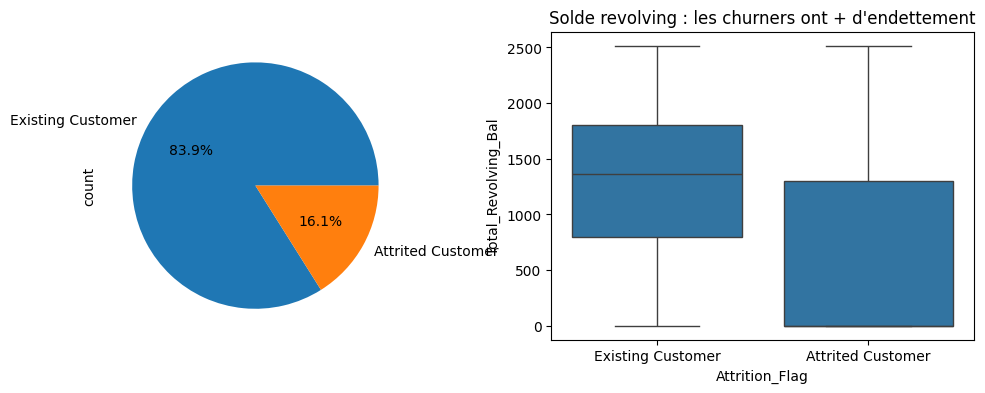

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Revolving_Bal')
plt.title("Solde revolving : les churners ont + d'endettement")
plt.show()

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.drop('Attrition_Flag')
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
# X = features, y = cible
X = df.drop(['Attrition_Flag', 'Churn'], axis=1)
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ANALYSE CORRÉLATION


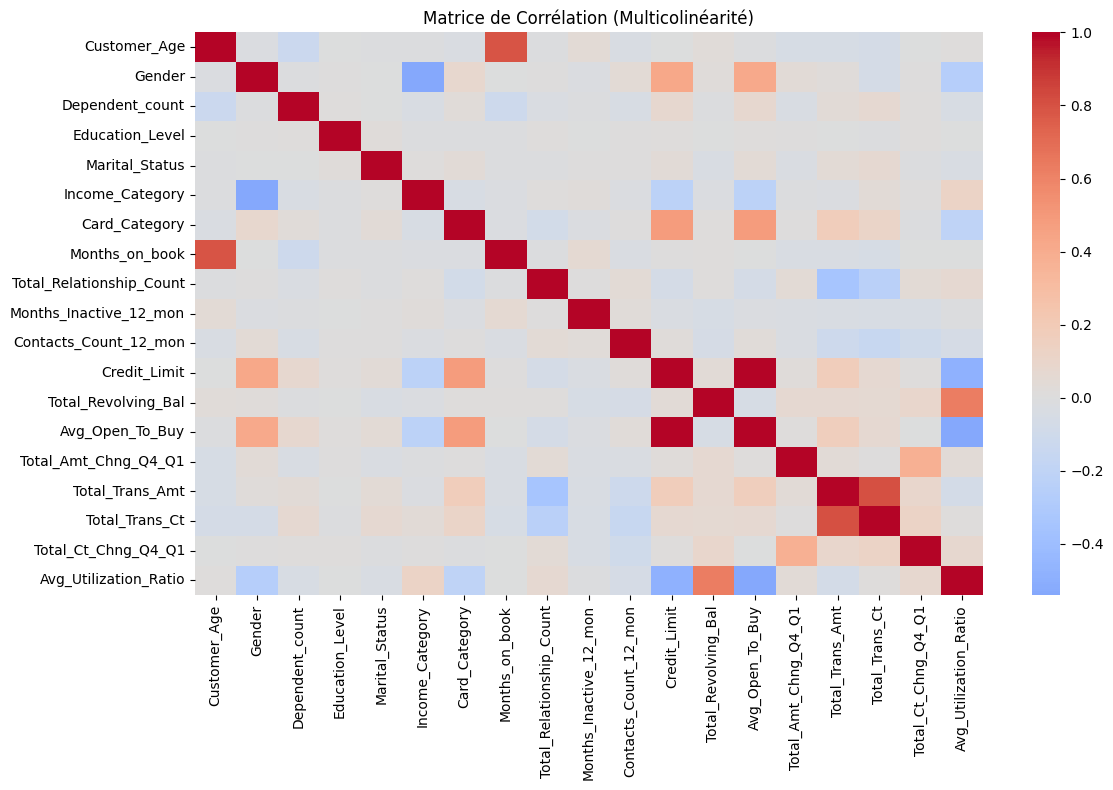

In [ ]:
print("ANALYSE CORRÉLATION")
plt.figure(figsize=(12,8))
corr_matrix = pd.DataFrame(X_train, columns=X.columns).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matrice de Corrélation (Multicolinéarité)")
plt.tight_layout()
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print(f" Meilleurs paramètres: {grid.best_params_}")
print(f" Meilleur AUC CV: {grid.best_score_:.3f}")

rf_best = grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:,1]

print(f"\n Random Forest Optimisé - AUC Test: {roc_auc_score(y_test, y_proba_rf):.3f}")
print(classification_report(y_test, y_pred_rf))

 Meilleurs paramètres: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
 Meilleur AUC CV: 0.987

 Random Forest Optimisé - AUC Test: 0.986
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2551
           1       0.92      0.80      0.86       488

    accuracy                           0.96      3039
   macro avg       0.94      0.89      0.92      3039
weighted avg       0.96      0.96      0.96      3039



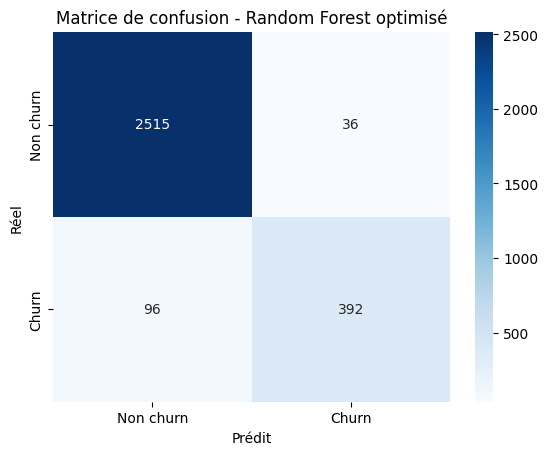

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non churn', 'Churn'],
            yticklabels=['Non churn', 'Churn'])
plt.title('Matrice de confusion - Random Forest optimisé')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

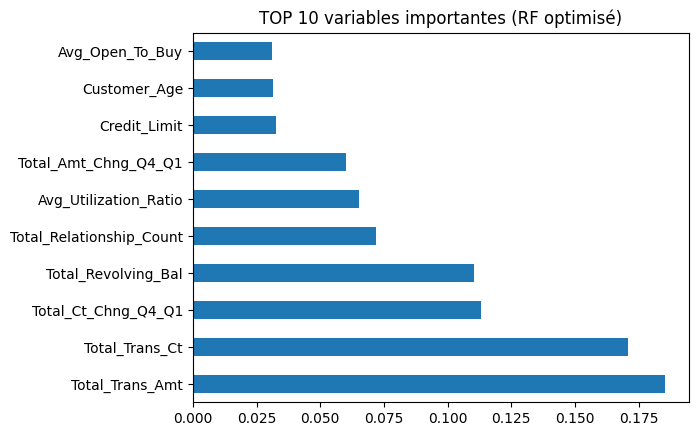

In [ ]:
importances = pd.Series(rf_best.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("TOP 10 variables importantes (RF optimisé)")
plt.show()

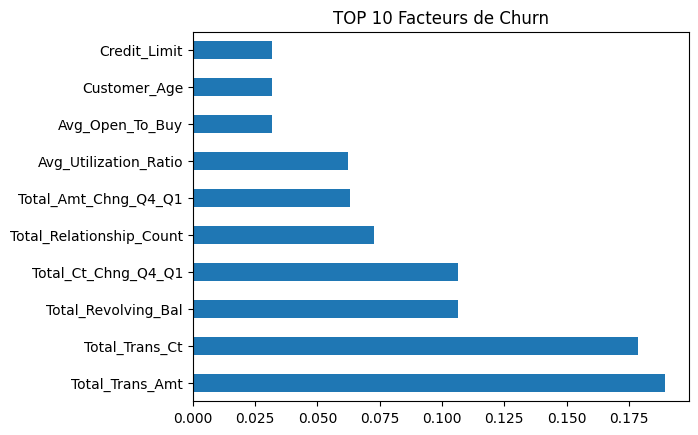

In [ ]:
rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
# Importance variables (QUEL FACTEUR explique le churn ?)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("TOP 10 Facteurs de Churn")
plt.show()